### Imports

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

### Variables

In [2]:
# Dictionary for data to be stored
information = {'College': [], 'Location': [], 'Type': [], 'Avg cost after aid': [], 'Acceptance Rate': []}
# User agent to have access to the site
# agent = removed

### Scraping

In [3]:
# going through each url
for i in range(14):
    # passing in url of site to scrape
    r = requests.get(f'https://www.niche.com/colleges/search/all-colleges/s/california/?type=communityCollege&type=private&type=public&page={i}').text
    soup = bs(r, 'lxml')

    # looping through each card containing individual college information
    for index, card in enumerate(soup.find_all('li', class_='search-results__list__item')):
    # adding to dictionary

        # adding college name
        information['College'].append(card.find('h2', class_='search-result__title').text)

        # only get the info from the first 2 list items
        for index, info in enumerate(card.find_all('li', class_='search-result-tagline__item')):
            if index == 2:
                break
            elif index == 1:
                information['Location'].append(info.text)
            else: # index == 0
                information['Type'].append(info.text)

        # only get the info from the first 2 list items
        for index, info in enumerate(card.find_all('span', class_='search-result-fact__value')):
            if index == 2:
                break
            elif index == 1:
                information['Avg cost after aid'].append(info.text)
            else:
                information['Acceptance Rate'].append(info.text)

### Viewing information

In [4]:
for key in information.keys():
    print(len(information[key]))

250
250
250
250
250


### Loading information in Dataframe

In [5]:
df = pd.DataFrame(information)
df.head()

,College,Location,Type,Avg cost after aid,Acceptance Rate
0,Stanford University,"Stanford, CA",4 Year,"$17,271",4%
1,California Institute of Technology,"Pasadena, CA",4 Year,"$26,361",7%
2,University of Southern California,"Los Angeles, CA",4 Year,"$36,161",13%
3,Pomona College,"Claremont, CA",4 Year,"$16,988",8%
4,University of California - Los Angeles,"Los Angeles, CA",4 Year,"$15,002",14%


### Cleaning

In [6]:
# converting string columns with numbers into ints
df['Acceptance Rate'] = pd.to_numeric(df['Acceptance Rate'].str.replace("%", ""))
df['Avg cost after aid'] = df['Avg cost after aid'].str.replace('$', "")
df['Avg cost after aid'] = pd.to_numeric(df['Avg cost after aid'].str.replace(",", "", 2))
# dropping duplicate rows
df.drop_duplicates(keep='last', inplace=True)
df.reset_index(inplace=True)
# dropping added columns
df.drop(['index'], axis=1, inplace=True)
# changing rows with location of "reviews" to online
filt = df['Location'].str.contains('reviews')
for row in list(df[filt].index):
    df['Location'].iloc[row] = 'Online'

C:\Users\Octavio\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Viewing dataframe

In [7]:
df.head()

,College,Location,Type,Avg cost after aid,Acceptance Rate
0,Stanford University,"Stanford, CA",4 Year,17271,4
1,California Institute of Technology,"Pasadena, CA",4 Year,26361,7
2,University of Southern California,"Los Angeles, CA",4 Year,36161,13
3,Pomona College,"Claremont, CA",4 Year,16988,8
4,University of California - Los Angeles,"Los Angeles, CA",4 Year,15002,14


In [8]:
print(len(df))
df.tail()

225


,College,Location,Type,Avg cost after aid,Acceptance Rate
220,West Coast University - Orange County,"Anaheim, CA",4 Year,40721,95
221,San Francisco Conservatory of Music,"San Francisco, CA",4 Year,39799,45
222,West Coast University - Los Angeles,"North Hollywood, CA",4 Year,42038,92
223,Los Angeles College of Music,"Pasadena, CA",4 Year,31317,100
224,Homestead Schools,"Torrance, CA",4 Year,12285,100


### Plotting

In [9]:
import matplotlib.pyplot as plt
# Too many samples, so splitting it into groups of 15
points = []
stops = [[0, 15], [15, 30], [30, 45], [45, 51]]
# adding x and y pairs to points,
for start, end in stops:
    points.append((list(df['College'].values)[start: end], list(df['Acceptance Rate'].values)[start :end]))

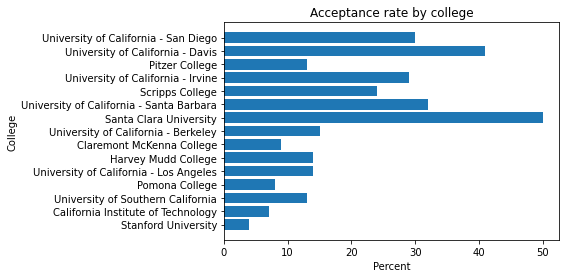

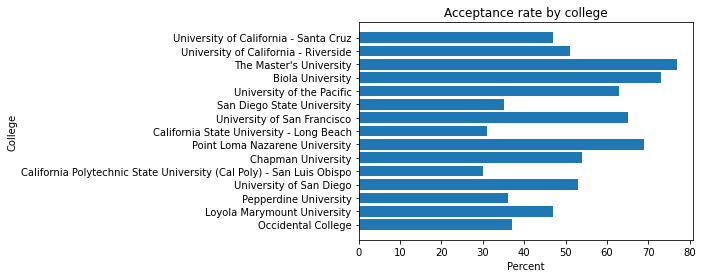

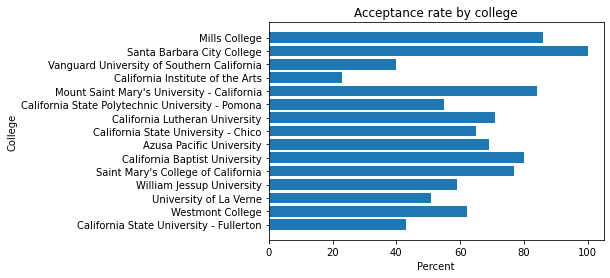

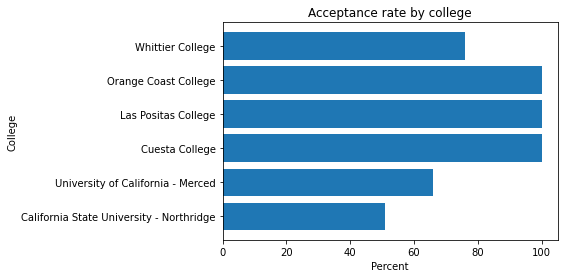

In [10]:
def show_plot(x, y):
    plt.barh(x, y)
    plt.xlabel('Percent')
    plt.ylabel('College')
    plt.title('Acceptance rate by college')
    plt.show()

# looping through pair in points
for x, y in points:
    show_plot(x, y)

## Questions

In [11]:
df.head()

,College,Location,Type,Avg cost after aid,Acceptance Rate
0,Stanford University,"Stanford, CA",4 Year,17271,4
1,California Institute of Technology,"Pasadena, CA",4 Year,26361,7
2,University of Southern California,"Los Angeles, CA",4 Year,36161,13
3,Pomona College,"Claremont, CA",4 Year,16988,8
4,University of California - Los Angeles,"Los Angeles, CA",4 Year,15002,14


### Q1. What city are most colleges located in?

In [12]:
df['Location'].value_counts().head(3)

Los Angeles, CA       11
San Diego, CA          7
San Francisco, CA      6
Name: Location, dtype: int64

#### A1:   Los Angeles

### Q2: What is the average acceptance rate per location? 

In [13]:
df.groupby('Location').mean()['Acceptance Rate'].head(4)

Location
Alameda, CA         100.0
Alhambra, CA        100.0
Aliso Viejo, CA      39.0
Anaheim, CA          77.5
Name: Acceptance Rate, dtype: float64

#### A2: above

### Q3: What location typically has the highest cost and which typically has the lowest cost

In [14]:
df.groupby('Location').mean()['Avg cost after aid']

Location
Alameda, CA             8423.0
Alhambra, CA           27539.0
Aliso Viejo, CA        14739.0
Anaheim, CA            31869.5
Angwin, CA             23005.0
                        ...   
Whittier, CA           15933.0
Wilmington, CA         11526.0
Woodland Hills, CA     11195.0
Woodland, CA            5722.0
Yucaipa, CA            16458.0
Name: Avg cost after aid, Length: 146, dtype: float64

#### A3: Online is typically the cheapest and the most expensive is  Santa Clara, CA

### Q4: How many types of colleges are there and how many are there of each?

In [15]:
df['Type'].value_counts()

4 Year              121
2 Year              101
4 Year (Online)       3
Name: Type, dtype: int64

#### A4: The types are 4 Year, 2 Year, and 4 Year (Online). There are 121 colleges that are 4 year, 101 colleges of 2 Year, and 3 college that is 4 Year (Online)